# Final Study Guide 12/14/18

8 Questions, 120 minutes. Mainly coding, but some conceptual questions and one math question 

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Landscape evolution

This is a nonlinear advection-diffusion equation where the quantity being transported is landscape elevation
# $ \frac{\delta z}{\delta t} = D \nabla^2 z - K(A^m |\nabla z|^n - \theta_c) + E$
### $ \frac{\delta z}{\delta t}$ = rate of change of landscape evolution 
### $ D \nabla^2 z$ = mass movement of sediment, a diffusion term
### $ |\nabla z|^n $ = channelized erosion, an advection term
### E = an uplift term
### A =  Horizontal area of landscape that drains to a particular point (the “upslope contributing area”)
### $\Delta_z$ = The gradient of the slope  
### $\theta_c$ = Limits the extent and magnitude of fluvial incision 

# 2. Discretizing equations - PDE

discretize, then rearrange for next time step

### PDE:  Function of multiple variables
Remember approximations for second order derivatives. If its an explicit scheme there should only be one f(t+dt) term, and you should rearrange for this term. Initial conditions: When t = 0. Boundary conditions: At the edges of the domain. Various types of boundary condition.
### Approximations for second order derivatives
# $ c^{2} \frac{\delta ^{2}H}{\delta t^{2}} + a \frac{\delta ^{2}H}{\delta x^{2}} = 0 $ 
<br \>
# $ c^2 \frac{H(t + \Delta t, x) + H(t - \Delta t, x) - 2H(x,t)}{\Delta t^2} + a \frac{H(t, x + \Delta x) + H(t, x- \Delta x) - 2H(t, x)}{\Delta x^2} = 0 $
<br \>
Set equal and solve
<br \>
$ H (t + \Delta t, x) = ? $ 

### Approximations of first order derivatives
value of previous time step, and divide by the difference
# $\frac{\delta H}{\delta t} = \frac{H(t + \Delta t, x) - H(t, x)}{\Delta t} $ 
# $ \frac{f(t + \Delta t) - f(t)}{\Delta t}$

### Boundary conditions:
edges of domain, ymin and ymax

###### static: set all boundaries to 0

##### flow: from one end to the other
<br \>
if x = xmax:
<br \>
    x + $\Delta x$ = xmin

# 3. Seismology

Remember how to read a file containing earthquake information and plot the columns
<br \>
#### Moment magnitude = $ M_w = \frac{2}{3} log_{10}(M_0) - 10.7 $ 
linking moment magnitude (w) with energy release (M0). Find distribution of energy by rearranging for M0, then take in w and import rearrange

#### Guttenberg - Richter relation = $ log_{10}(N) = a - bM  $
N is # of earthquakes with magnitude >= M. Step through values of N, find the number of earthquakes. b is a gradiaent, a  is an intercept, M is a line


Example from last year's test:
Set up a random array of integers. In an earthquake, a building will be destroyed. Simulate # of eq it takes to flatten. While loop -> if statements -> loop over values and figure out what neighbors are

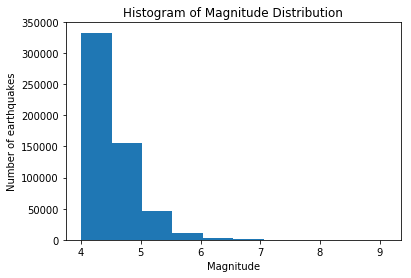

In [7]:
data = np.loadtxt('earthquakes_since_1970.csv', delimiter = ',')
long = data[:,0]
lat = data[:,1]
depth = data[:,2]
magnitude = data[:,3]

plt.hist(magnitude)
plt.xlabel('Magnitude')
plt.ylabel('Number of earthquakes')
plt.title('Histogram of Magnitude Distribution')
plt.show()

# 4. ODEs

Numerical solution to ODEs: Euler vs Runge Kutta
<br \>
<br \>
$ f'(x,t) =  g(x,t) $
<br \>
<br \>
want to know value of f(x,t) at different values of time
<br \>
$\frac{dy}{dt} = g(x) $ 
<br \>
want to find values of y
<br \>
$ \int dx = \int y(x) dt$
<br \>
How to integrate an ODE:
<br \>
### Euler's Method:
## $ f(y, t) = \frac{y(t + \Delta t) - y(t)}{\Delta t} $ 
Pick the next time step;
## $ y(t + \Delta t) = \Delta t * f(y, t) + y(t)$ 
Start from an initial condition f(x,0) = g(x,0)
<br \>
y(t=0) = __ and take steps in time. 
<br \>
This is the same thing as integrating the equation

### Runge Kutta 4 method:
more complicated way of solving y(t+1)
<br \>
evaluate at different times at different spaces 
<br \>
<br \>
$y_{n+1} = y_n + \frac{1}{6} (k_1 + 2k_2 + 2k_3 + k_4)$
<br \>
<br \>
$t_{n+1} = t_n + \Delta t $
<br \>
for n = 0, 1, 2, 3
#### Eulers: error reduced to  $ 0 (\Delta t^2) $ Only calculating 1 thing
#### Rk4: error reduced to $ 0 (\Delta t^4)$ More expensive, calculate 4 k values, more accurate

# 5. Indexing and slicing numpy arrays 

# 6. Random walks 

# 7. Imaging processing lab (#13), especially question 1 (filling a 3D array with color)

Find an area of maple leaf, matrix colored black or white (1 or 0). Loop over i and j, value 1 or 0, if 0 add 1, if 1 then dont. If 0, check neighbors if value 1, then add pixel value, get sum of the perimeter. c.) i and j knows positions, save them and calculate mean

# 8. Orbital dynamics simulations (lab & homework 11)

know how to set up orbital dynamics simulation

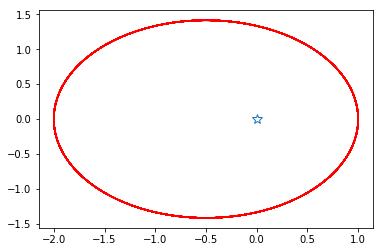

In [6]:
ms = 3e+6
mp = 1
G  = 1e-6

# initial positions
r = np.array([1, 0])

# initial velocities
v = np.array([0, 2]);

t = 0
tMax = 100.0
dt   = 0.001;
n    = tMax / dt

xt = []
yt = []
vxy = []
vyt = []
kint = []
pott = []
et = []
tt = []

def KeplerODE(t,y):
    global mp,ms,G

    r = y[0:2]
    v = y[2:4]
    
    drdt = v 

    F    = - ms * mp * G / np.linalg.norm(r)**3 * r
    a    = F / mp
    dvdt = a
    
    return np.concatenate((drdt,dvdt))

y = np.concatenate((r,v))

while (t<tMax):
    r = y[0:2]
    v = y[2:4]
    

    kin = 1.0/2.0*mp* np.linalg.norm(v)**2   #kinetic energy
    pot = -mp*ms*G / np.linalg.norm(r)     #potential energy
    e   = kin+pot

    
    xt.append(r[0])
    yt.append(r[1])
    kint.append(kin)
    pott.append(pot)   #gravitational potential
    et.append(e)
    tt.append(t)
    
#     dydt = KeplerODE(t,y)
#     y = y + dydt*dt                        #Eulers method

    f1 = KeplerODE(t       ,y          )     #Runge Kutta Method
    f2 = KeplerODE(t+dt/2.0,y+f1*dt/2.0)
    f3 = KeplerODE(t+dt/2.0,y+f2*dt/2.0)
    f4 = KeplerODE(t+dt    ,y+f3*dt    )

    y = y + (f1 + 2.0*f2 + 2.0*f3 + f4) / 6.0 * dt
    t = t + dt
    
plt.plot(xt,yt,'r-')

plt.plot(0,0,'*',mfc='w',ms=10)
    
plt.show()


# 9. Labyrinth

time step, a loop over a length or a while until met. Fills cells, branching, each branch has 2 bends, look at neighbors of branches to decide if it branches again. Decides randomly?

In [62]:
%matplotlib osx  
n = 10
data = np.zeros((n, n))

xStart = len(data)//2
yStart = 0

xmax = len(data[0])
ymax = len(data[1])
#data[0, len(data)//2] = 1
split = np.random.random() 

x  = xStart 
y  = yStart
while True:
        
        if y <= split * len(data[0]):
            data[y, x] = 1
            y += 1
        #move in the x direction forwards and backwards
        elif y > split * len(data[0]):
            data[ y , x] = 1
            x += 1
            if y  
            
            #data[ y , x] = 1
            #x -= 1
            
        if x == xmax:
            break
        if y == ymax:
            break
        
    
        plt.imshow(data,interpolation='nearest')

        plt.draw()
        plt.pause(0.005)
        plt.show()

SyntaxError: invalid syntax (<ipython-input-62-7374e8c49b23>, line 24)

In [42]:
data[1][3]

0.0